In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import ternary

In [3]:
ssb_utility = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])
alpha = np.ones(3)
rng = np.random.default_rng()
p, q, r = [rng.dirichlet(alpha) for i in range(3)]
p, q, r

(array([0.32563352, 0.4661358 , 0.20823067]),
 array([0.26513064, 0.1431418 , 0.59172756]),
 array([0.35306256, 0.10718046, 0.53975698]))

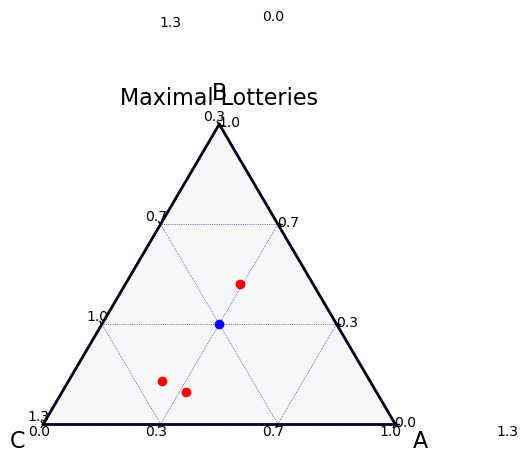

In [16]:
figure, tax = ternary.figure(scale=1)
figure.set_size_inches(5, 4.5)
tax.scatter([p, q, r], color='red')
tax.scatter([np.array([1/3, 1/3, 1/3])], color='blue')

fontsize = 16
tax.set_title("Maximal Lotteries", fontsize=fontsize)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.333, color="blue")
tax.ticks(axis='lbr', linewidth=1, multiple=0.333, tick_formats="%.1f")
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')
tax.right_corner_label("A", fontsize=fontsize)
tax.top_corner_label("B", fontsize=fontsize)
tax.left_corner_label("C", fontsize=fontsize)

In [9]:
(p.T @ ssb_utility @ q >= 0 and q.T @ ssb_utility @ r >= 0 and r.T @ ssb_utility @ p >= 0) or (p.T @ ssb_utility @ q <= 0 and q.T @ ssb_utility @ r <= 0 and r.T @ ssb_utility @ p <= 0)

True

In [20]:
for _ in range(10):
    middle_contained = 0
    repetitions = 100000
    for _ in range(repetitions):
        p, q, r = [rng.dirichlet(alpha) for i in range(3)]
        middle_contained += (p.T @ ssb_utility @ q >= 0 and q.T @ ssb_utility @ r >= 0 and r.T @ ssb_utility @ p >= 0) or (p.T @ ssb_utility @ q <= 0 and q.T @ ssb_utility @ r <= 0 and r.T @ ssb_utility @ p <= 0)
    print(middle_contained / repetitions)

0.2465
0.24321
0.2438
0.24504
0.24679
0.24666
0.2446
0.24815
0.24712
0.24325


In [21]:
alpha

array([1., 1., 1.])